# Analysis and visualisation of results

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import helpers as h

In [3]:
data_path = "../results/valid_tests_2"
encryption_methods = ["masked_ASCON", "ASCON", "AES-GCM", "NONE"]
metrics = ["RTT", "S_PROC", "R_PROC", "DS_PROC", "DS_ENC", "DS_DEC","GW_US_PROC", "GW_DS_PROC", "ENC", "DEC"]
scenarios = 12


paths = {}
for encryption_method in encryption_methods:
    if encryption_method not in paths:
        paths[encryption_method] = []
    for i in range(1,scenarios+1):
        path = os.path.join(data_path, encryption_method, f"{encryption_method}_scen{i}")
        paths[encryption_method].append(path)

In [4]:
frames = {}

for encryption_method in encryption_methods:
    if encryption_method not in frames:
        frames[encryption_method] = []
    for i in range(0,scenarios):
        frames[encryption_method].append(h.load_and_merge_logs(paths[encryption_method][i]))

In [5]:
h.add_hw_and_networking_time(frames)
h.add_encyprion_time_of_RTT(frames)

'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'


In [7]:
frames["ASCON"][11]

,NTNU_network_time_Delta,BLE_transmission_time_Delta,RTT_Delta,S_PROC_Delta,R_PROC_Delta,DS_PROC_Delta,DS_ENC_Delta,DS_DEC_Delta,GW_US_PROC_Delta,GW_DS_PROC_Delta,ENC_Delta,DEC_Delta,HW_and_Network_Delta,percent_of_RTT_Delta,DS_crypto_time_Delta,DS_encryption_time_of_RTT_Delta,S_crypto_time_Delta,S_encryption_time_of_RTT_Delta
0,86.616647,38.457,133.006,1.538,0.651,2.222353,0.580017,0.967309,1.970,1.551,0.426,0.420,125.073647,94.036094,1.547326,1.163351,0.846,0.636062
1,86.192212,57.064,151.496,1.539,0.579,2.256788,0.581189,1.045878,1.719,2.146,0.408,0.368,143.256212,94.561052,1.627067,1.074000,0.776,0.512225
2,85.146169,55.124,147.874,1.530,0.567,2.233831,0.603009,0.969662,1.765,1.508,0.406,0.356,140.270169,94.857899,1.572671,1.063521,0.762,0.515304
3,85.046230,51.505,143.898,1.535,0.563,2.021770,0.583903,0.774584,1.719,1.508,0.397,0.355,136.551230,94.894460,1.358487,0.944062,0.752,0.522592
4,87.185502,44.761,139.873,1.507,0.567,2.079498,0.627535,0.776887,2.156,1.617,0.397,0.361,131.946502,94.333075,1.404422,1.004069,0.758,0.541920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,282.336767,89.548,380.206,1.597,0.571,2.494233,0.611435,0.737964,2.149,1.510,0.401,0.357,371.884767,97.811388,1.349399,0.354913,0.758,0.199366
96,240.241922,128.657,376.542,1.579,0.570,2.259078,0.495627,1.126588,1.725,1.510,0.405,0.360,368.898922,97.970192,1.622215,0.430819,0.765,0.203165
97,295.620776,94.195,397.984,1.587,0.570,2.183224,0.593962,0.905260,2.164,1.664,0.401,0.356,389.815776,97.947600,1.499222,0.376704,0.757,0.190209
98,212.898849,72.771,293.838,1.587,0.567,2.298151,0.604713,0.992455,2.159,1.557,0.403,0.361,285.669849,97.220186,1.597168,0.543554,0.764,0.260007


In [6]:
frames["masked_ASCON"][1]["test"] = frames["masked_ASCON"][1]["RTT_Delta"] - frames["masked_ASCON"][1]["S_PROC_Delta"] - frames["masked_ASCON"][1]["R_PROC_Delta"] - frames["masked_ASCON"][1]["GW_DS_PROC_Delta"] - frames["masked_ASCON"][1]["GW_US_PROC_Delta"]- frames["masked_ASCON"][1]["DS_PROC_Delta"]

In [7]:
# h.get_stats(frames, 1, "RTT")
frames["masked_ASCON"][9].columns

Index(['NTNU_network_time_Delta', 'BLE_transmission_time_Delta', 'RTT_Delta',
       'S_PROC_Delta', 'R_PROC_Delta', 'DS_PROC_Delta', 'DS_ENC_Delta',
       'DS_DEC_Delta', 'GW_US_PROC_Delta', 'GW_DS_PROC_Delta', 'ENC_Delta',
       'DEC_Delta', 'HW_and_Network_Delta', 'percent_of_RTT_Delta',
       'DS_crypto_time_Delta', 'DS_encryption_time_of_RTT_Delta',
       'S_crypto_time_Delta', 'S_encryption_time_of_RTT_Delta'],
      dtype='object')

In [8]:
h.get_encryption_stats(frames, "NONE", "RTT")

,Mean_RTT,Std_RTT
0,218.26280,89.603992
1,226.83205,92.638738
2,248.23624,95.533380
3,255.74535,81.961436
4,227.58665,77.417713
5,238.49258,92.642621
6,245.50847,72.274084
7,233.44787,87.351228
8,248.15288,81.608062
9,241.41689,78.563683


Saved RTT
Saved S_PROC
Saved R_PROC
Saved DS_PROC
Saved DS_ENC
Saved DS_DEC
Saved GW_US_PROC
Saved GW_DS_PROC
Saved ENC
Saved DEC
Saved HW_and_Network
Saved percent_of_RTT
Saved DS_encryption_time_of_RTT
Saved S_encryption_time_of_RTT
Saved NTNU_network_time
Saved BLE_transmission_time


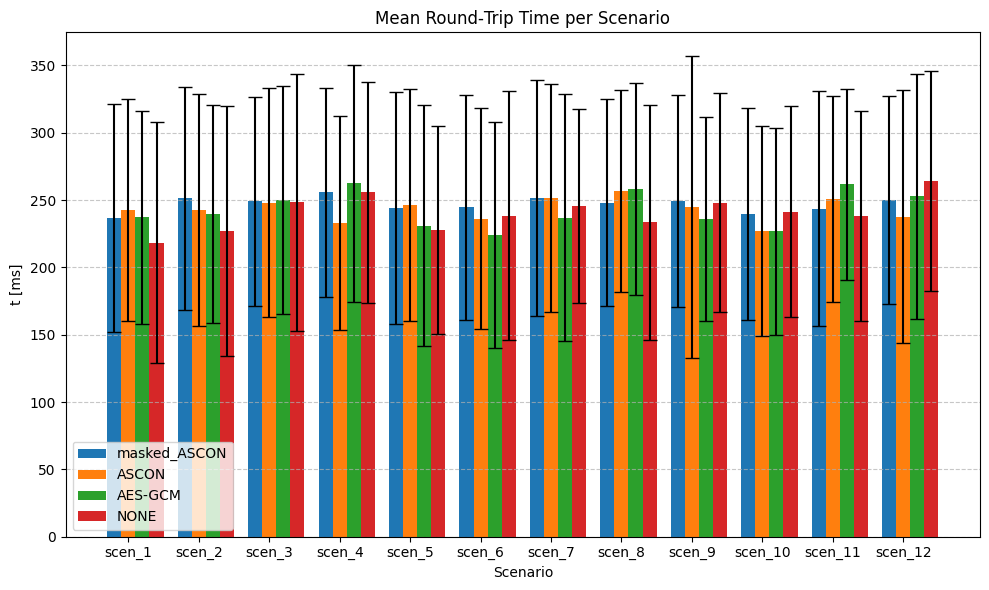

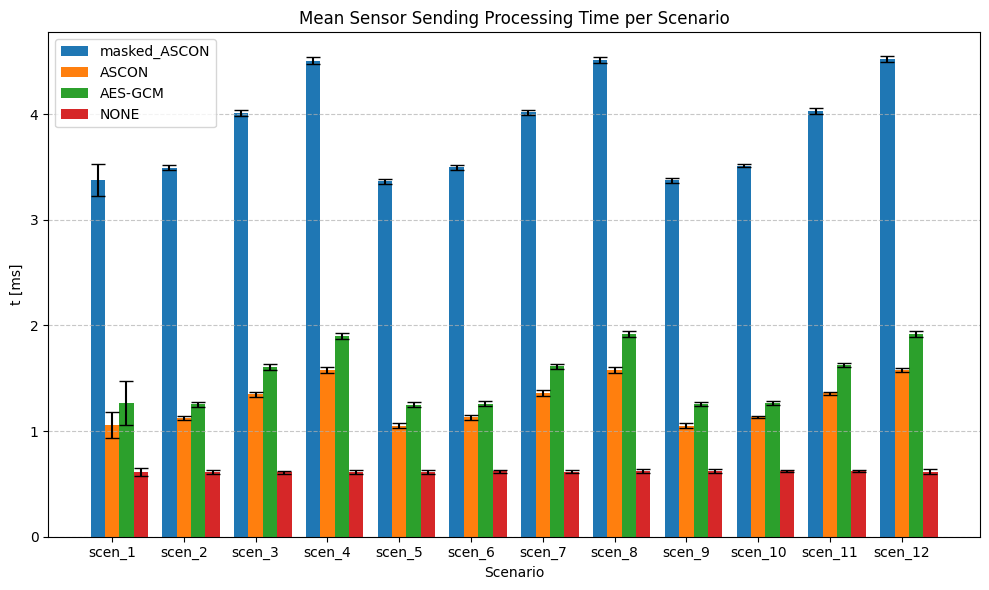

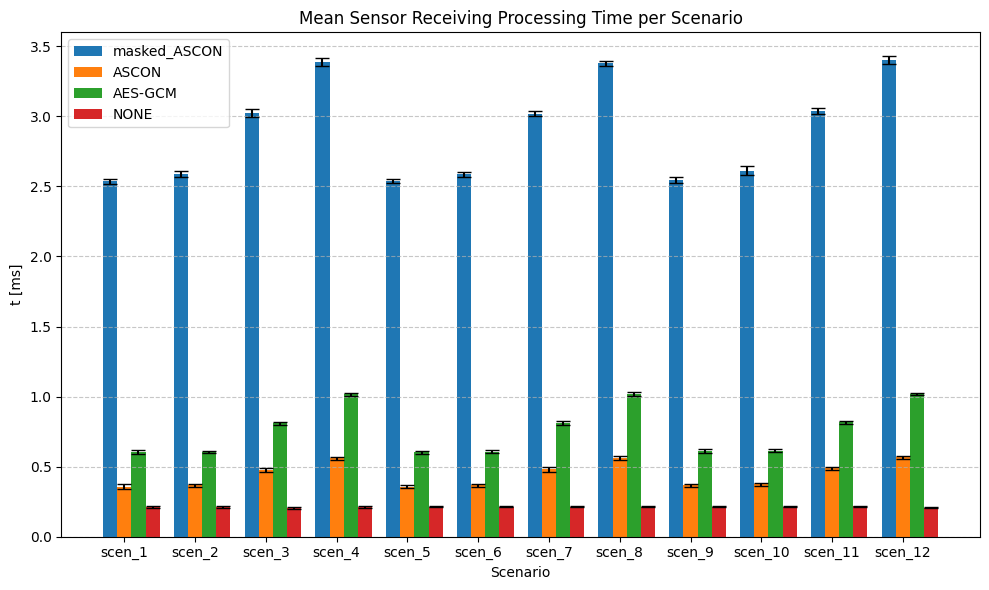

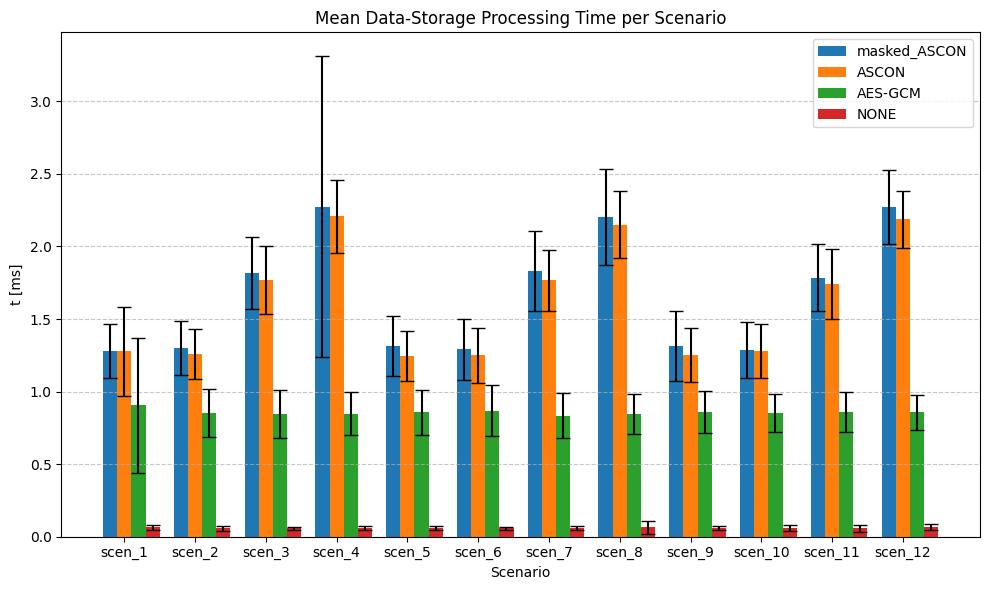

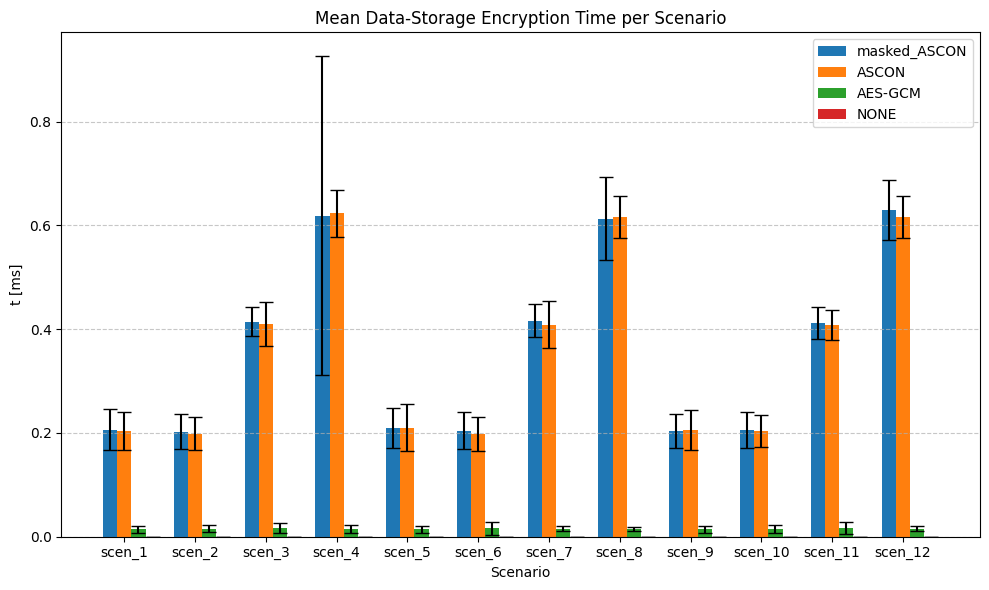

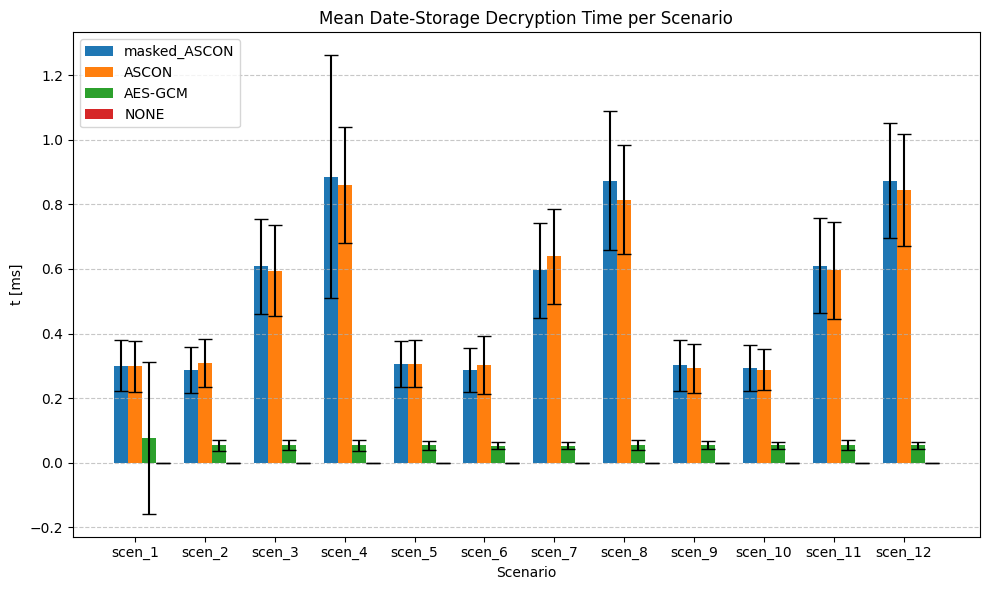

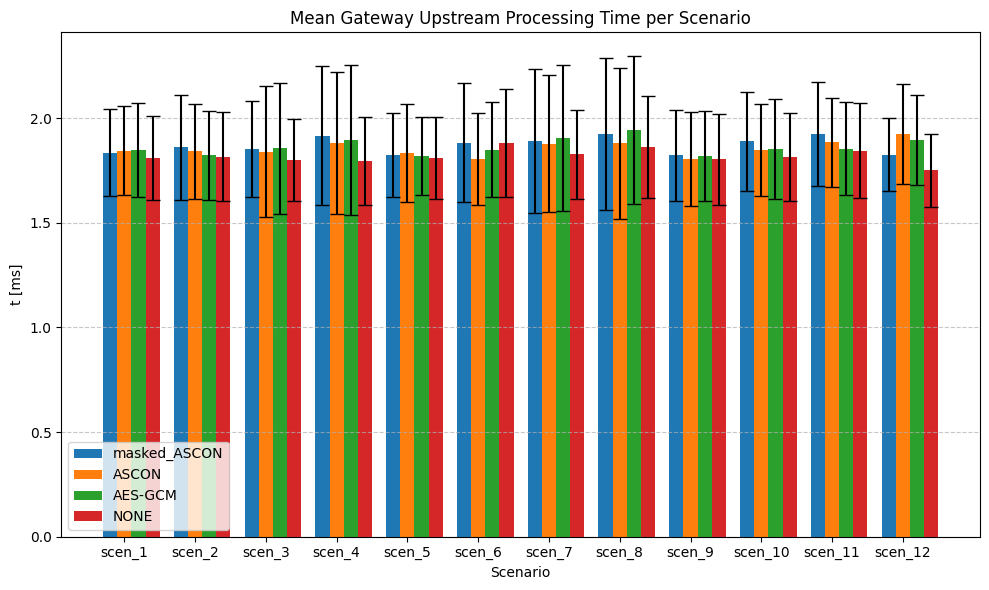

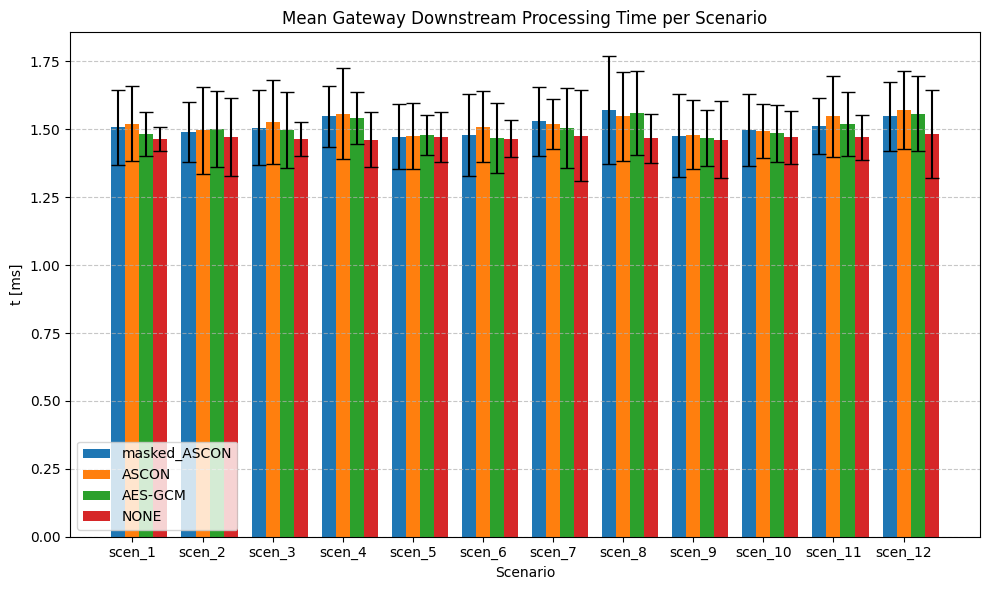

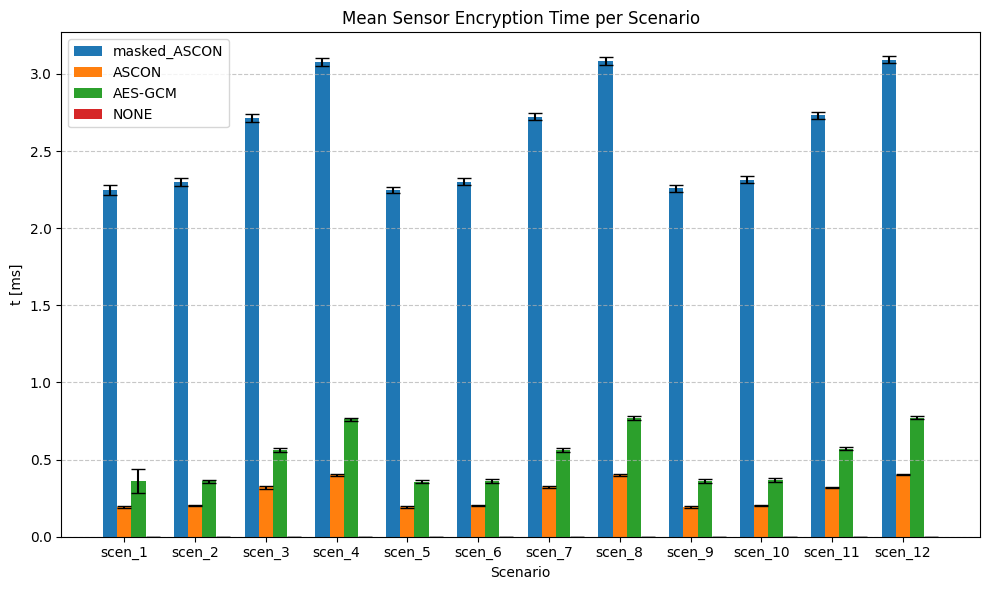

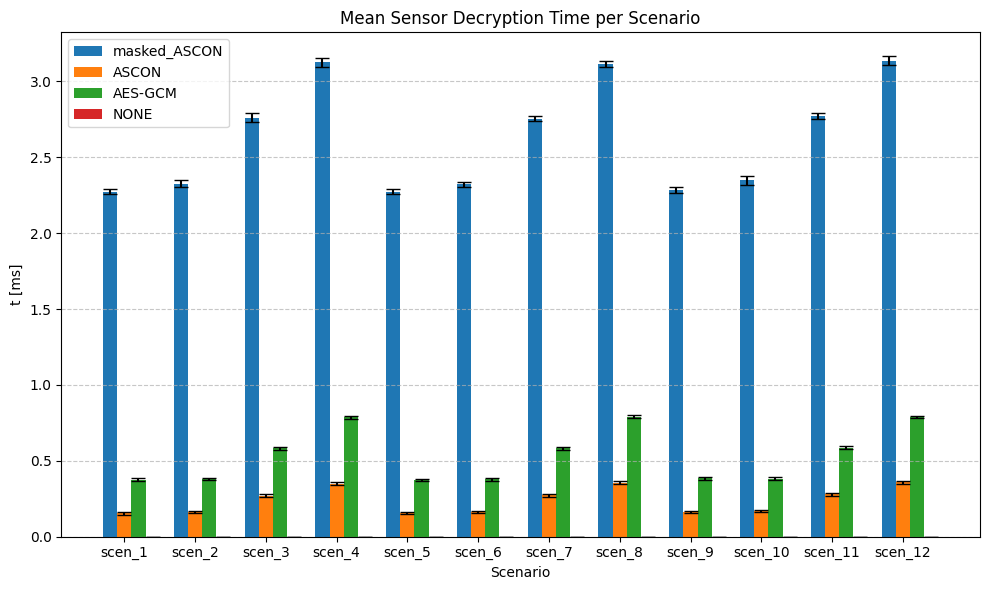

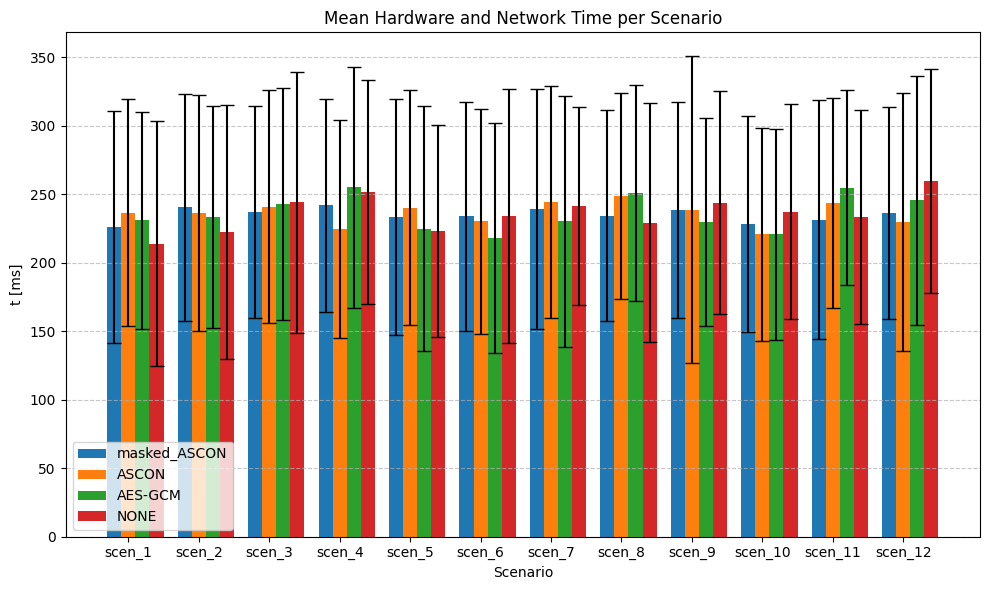

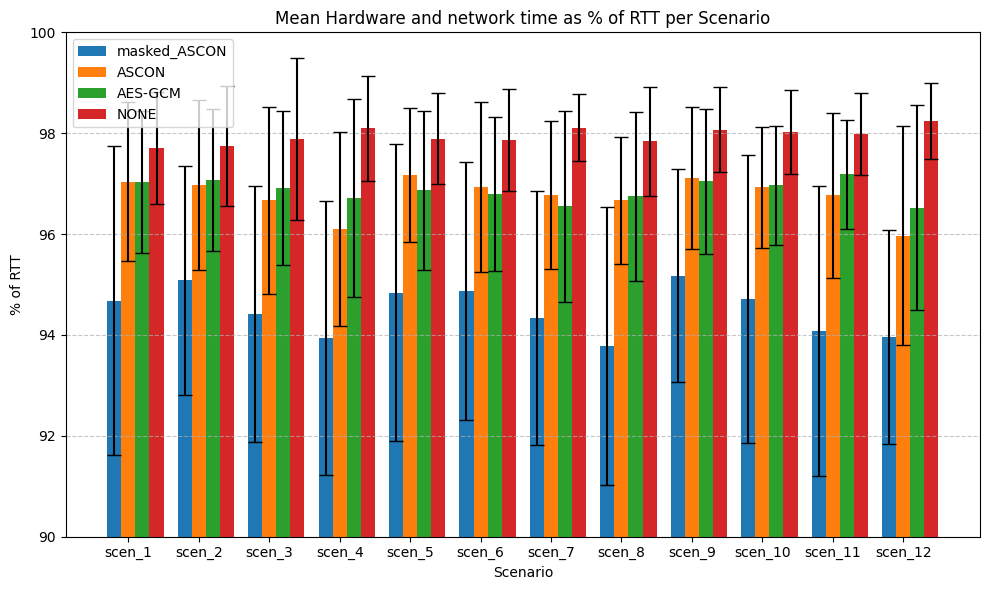

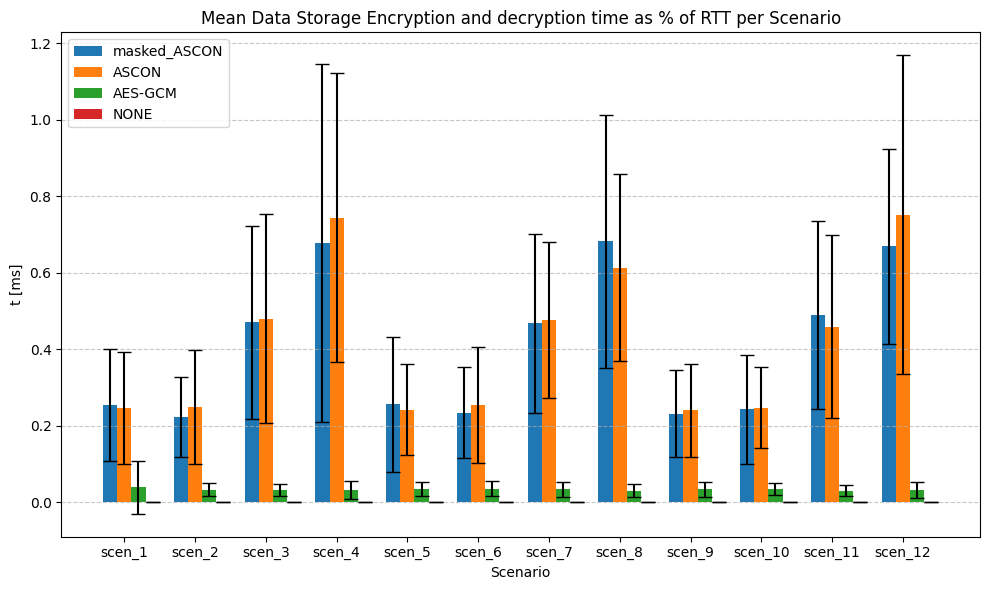

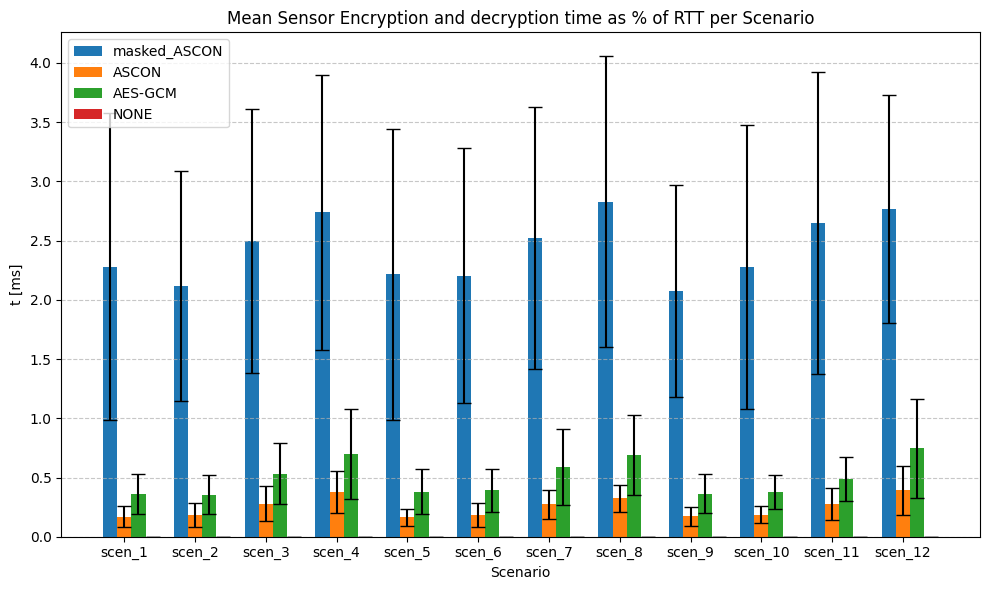

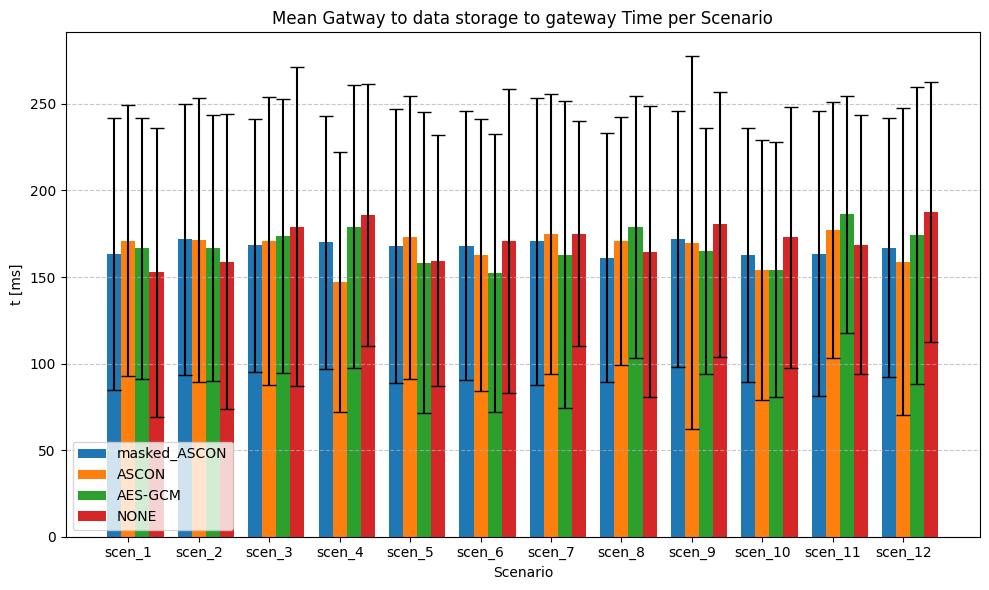

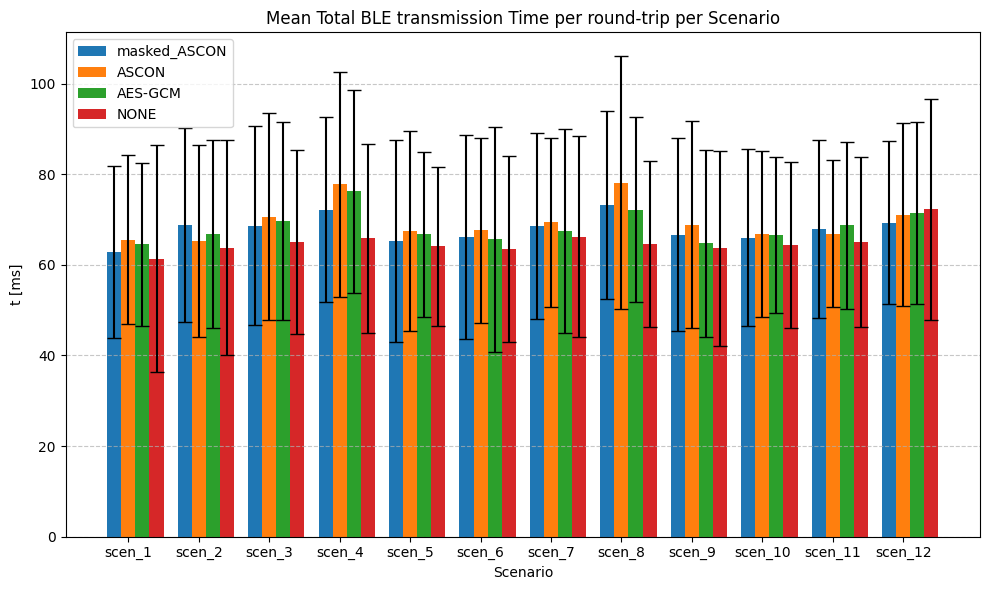

In [9]:
figure_path = os.path.join("..")
h.analyse_execution_times(frames, figure_path)

In [10]:
h.get_stats(frames, 11, "DS_DEC")

,Method,Mean_DS_DEC,Std_DS_DEC
0,masked_ASCON_DS_DEC,0.609523,0.146792
1,ASCON_DS_DEC,0.596098,0.150715
2,AES-GCM_DS_DEC,0.055845,0.016203
3,NONE_DS_DEC,0.000000,0.000000
